### CS156 Pre-Class Work for Session 8.1

#### Training Complexity

In [0]:
'''Write a python function from which you can generate synthetic datasets of an arbitrary size 
(e.g. a mixture model of two Gaussians)
By training SVMs on datasets of different sizes show:

1. how the training time scales.
2. how the classification time scales (on a sample of 1000 unseen datapoints).
3. the accuracy of the classifier (on a sample of 1000 unseen datapoints).

Choose a kernel that you think is appropriate to the task at hand. 
Come to class with your code and results in a plaintext format suitable for pasting into a poll.'''

from sklearn.datasets import make_classification
from sklearn.svm import SVC
import time
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def fake_data(n):
    X1, Y1 = make_classification(n_samples=n, n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1)
    return X1, Y1

x, y = fake_data(6000)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=1000, random_state=42)

In [0]:
clf = SVC(gamma='auto')

train_time_scale = []
for i in range(100, 6000,100):
    start = time.time()
    clf.fit(X_train[:i], y_train[:i])
    end = time.time()
    train_time_scale.append(end-start)

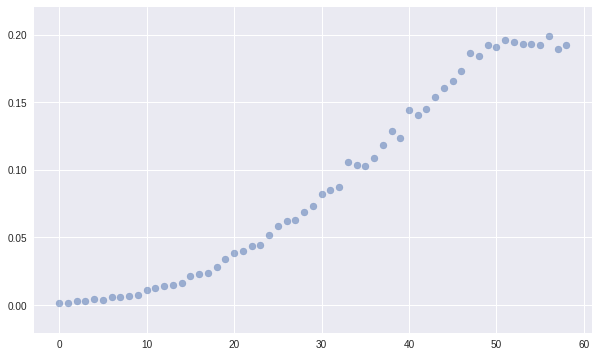

In [0]:
plt.figure(figsize=(10,6))
plt.scatter(range(59), train_time_scale, alpha=0.5)
plt.show()

In [0]:
test_time_scale = []
for i in range(1, 1000,10):
    start = time.time()
    clf.predict(X_test[:i])
    end = time.time()
    test_time_scale.append(end-start)

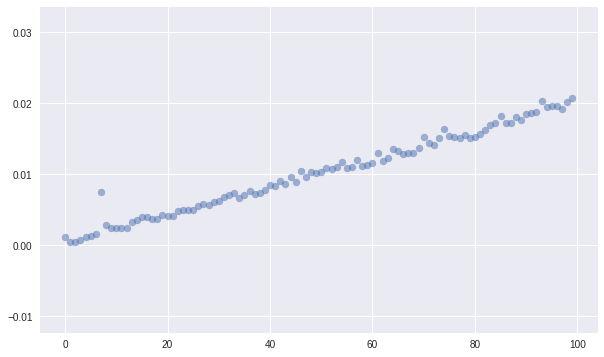

In [0]:
plt.figure(figsize=(10,6))
plt.scatter(range(100), test_time_scale, alpha=0.5)
plt.show()

In [0]:
print(clf.score(X_test, y_test))

0.922
